# Código para obtención, procesamiento y almacenamiento de los datos

##Carga de datos

In [ ]:
# Librerias a importar
import pandas as pd

# Carga de datos
from google.colab import files
data = files.upload()

training = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')
validation = pd.read_csv('/content/validation.csv')

Saving test.csv to test.csv
Saving training.csv to training.csv
Saving validation.csv to validation.csv


## Limpieza de datos

### Colocar etiquetas a las emociones

In [ ]:
emotion_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
training['emotion'] = training['label'].map(emotion_dict )
validation['emotion'] = validation['label'].map(emotion_dict )
test['emotion'] = test['label'].map(emotion_dict )
training.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Búsqueda de registros duplicados y vacíos

In [ ]:
training[training.duplicated()]

,text,label,emotion
13846,i feel more adventurous willing to take risks ...,1,joy


In [ ]:
training = training.drop_duplicates().reset_index(drop=True)

In [ ]:
validation[validation.duplicated()] # No hay duplicados

,text,label,emotion


In [ ]:

test[test.duplicated()] # No hay duplicados

,text,label,emotion


In [ ]:
training[training.isnull().any(axis=1)] 

,text,label,emotion


In [ ]:
validation[validation.isnull().any(axis=1)]

,text,label,emotion


In [ ]:
test[test.isnull().any(axis=1)]

,text,label,emotion


In [ ]:
# No se encuentran campos vacíos en ningún conjunto

### Limpieza de texto

In [ ]:
# Se eliminan Caracteres extraños y signos de puntuación
def limpiar(tweet, diccionario):

  tweet_corregido = tweet

  for error, correccion  in diccionario.items():
    tweet_corregido = tweet_corregido.replace(error, correccion)

  return tweet_corregido

In [ ]:
dicc_caracteres_extraños = {"!": "", "\"": "",  "#": "", "$": "", "%":"",  "&":"", "'":"",  "(": "", ")": "", "*":"", "+":"", ",": "", "-":"", ".":"", "/":"", ":":"", ";":"", "<":"",  "=":"", ">":"",  "?":"", "@":"", "[":"", "]":"", "^":"",  "_":"",  "`":"", "{":"",  "|":"", "}":"", "~":""}

In [ ]:
training['text'] = training['text'].apply(limpiar, diccionario=dicc_caracteres_extraños)
validation['text'] = validation['text'].apply(limpiar, diccionario=dicc_caracteres_extraños)
test['text'] = test['text'].apply(limpiar, diccionario=dicc_caracteres_extraños)

In [ ]:
training['text'] = training['text'].apply(lambda x: x.lower())
validation['text'] = validation['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())

In [ ]:
# Diccionarios para corrección de contracciones y errores ortográficos
dicc_contracciones1 = { "aint": "are not","hadnt":"had not","hadntve":"had not have","shes":"she is", "hes": "he is","arent": "are not","cant": "cannot","cantve": "cannot have", "cause": "because","couldve": "could have","couldnt": "could not", "couldntve": "could not have", "doesnt": "does not", "hasnt": "has not","havent": "have not","hed": "he would", "hedve": "he would have","hell": "he will", "hellve": "he will have", "howd": "how did","howdy": "how do you","howll": "how will", "id": "i would", "idve": "i would have","ill": "i will", "illve": "i will have","im": "i am","ive": "i have", "isnt": "is not", "itd": "it would","it'd've": "it would have","itll": "it will", "itll've": "it will have", "lets": "let us","ma'am": "madam", "maynt": "may not","mightve": "might have","mightnt": "might not", "mightntve": "might not have","mustve": "must have","mustnt": "must not", "mustntve": "must not have", "neednt": "need not", "needntve": "need not have","oclock": "of the clock","oughtnt": "ought not", "oughtntve": "ought not have","shant": "shall not","shant": "shall not", "shantve": "shall not have","shed": "she would","shedve": "she would have", "shell": "she will", "shellve": "she will have","shouldve": "should have", "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",  "thatd": "that would","thatdve": "that would have", "thered": "there would", "theredve": "there would have", "theyd": "they would", "theydve": "they would have","theyll": "they will", "theyllve": "they will have", "theyre": "they are","theyve": "they have", "tove": "to have","wasnt": "was not","wed": "we would", "wedve": "we would have"}
dicc_contracciones2 ={"well":"we will", "wellve": "we will have", "were": "we are","weve": "we have", "werent": "were not","whatll": "what will", "whatllve": "what will have","whatre": "what are", "whatve": "what have", "whenve": "when have","whered": "where did", "whereve": "where have", "wholl": "who will","whollve": "who will have","whove": "who have", "whyve": "why have","willve": "will have","wont": "will not", "wontve": "will not have", "wouldve": "would have","wouldnt": "would not", "wouldntve": "would not have","yall": "you all", "yalld": "you all would", "yalldve": "you all would have","yallre": "you all are", "yallve": "you all have", "youd": "you would","youdve": "you would have", "youll": "you will","youllve": "you will have", "youre": "you are", "youve": "you have", "didnt": "did not", "ive": "i have", "proto": "prototype", "dont":"do not", "im":"i am", "lenghth":"length", "misspelt":"misspelled", "havent":"have not", "didn":"did not", "t": "", "ok": "okay", "fam":"family", "theyre":"they are", "m": "am", "ve": "have", "s":"is", "wouldnt":"would not", "doesn":"does not", "wasnt": "was not", "couldn": "could not", "artifically":"artificially", "youd": "you would", "whats":"what is", "isnt": "is not", "thats":"that is", "arent": "are not", "heres":"here is", "educationg":"education", "theres":"there is", "cos": "because", "don":"do not", "excelent":"excellent", "weve":"we have", "nov":"now", "href":"", "arrangment":"arrangement", "cant":"can not", "toni ight":"tonight", "theyd":"they would", "allthingsbucks":"all things bucks", "shouldnt":"should not", "http":"", "utf":"", "isprivate":"is private", "ismobile":"is mobile", "mobileclass":"mobile class", "is private blog":"isprivateblog", "languagedirection":"language direction", "ltr":"", "youll":"you will", "stinkin":"stinking", "px":"", "committment":"commitment", "itll":"it will", "noticable":"noticeable", "bodyworks":"body works", "isn":"is not", "coz":"because"}
# Unión de los diccionarios
dicc_contracciones = dict(dicc_contracciones1, **dicc_contracciones2)

In [ ]:
# Corrección de corrección de contracciones y errores ortográficos
def correccion(tweet, dicc_contracciones):
  tweet_corregido =''
  for palabra in tweet.split(' '):
    nueva_palabra = palabra
    if palabra in dicc_contracciones.keys():
      nueva_palabra = dicc_contracciones[palabra]
    
    if nueva_palabra=="":
      tweet_corregido = tweet_corregido
    else:
      tweet_corregido = tweet_corregido + nueva_palabra + " "

  return tweet_corregido[:-1]


In [ ]:
training['text']=training['text'].apply(correccion, dicc_contracciones=dicc_contracciones)
validation['text'] = validation['text'].apply(correccion, dicc_contracciones=dicc_contracciones)
test['text'] = test['text'].apply(correccion, dicc_contracciones=dicc_contracciones)

### Guardar los ficheros limpiados

In [ ]:
training.to_csv("datos_limpiados.csv", index= False)
validation.to_csv("validation_limpiados.csv", index= False)
test.to_csv("test_limpiados.csv", index= False)

## Creación de una base de datos para clasificación de polaridad

### Eliminar registro asociados a sorpresa

In [ ]:
trainingB = training[~(training['emotion']=='surprise')].reset_index(drop=True)
validationB = validation[~(validation['emotion']=='surprise')].reset_index(drop=True)
testB = test[~(test['emotion']=='surprise')].reset_index(drop=True)

### Colocar etiquetas binarias

In [ ]:
binary_label = {'sadness':0, 'joy':1, 'love':1, 'anger':0,'fear':0}
trainingB['label'] = trainingB['emotion'].map(binary_label )
validationB['label'] = validationB['emotion'].map(binary_label )
testB['label'] = testB['emotion'].map(binary_label )

In [ ]:
binary_emotion = {'sadness':'negative', 'joy':'positive', 'love':'positive', 'anger':'negative','fear':'negative'}
trainingB['emotion'] = trainingB['emotion'].map(binary_emotion )
validationB['emotion'] = validationB['emotion'].map(binary_emotion )
testB['emotion'] = testB['emotion'].map(binary_emotion )
trainingB.head()

,text,label,emotion
0,i did not feel humiliated,0,negative
1,i can go from feeling so hopeless to so damned...,0,negative
2,i am grabbing a minute to post i feel greedy w...,0,negative
3,i am ever feeling nostalgic about the fireplac...,1,positive
4,i am feeling grouchy,0,negative


### Guardar la base de datos binaria

In [ ]:
trainingB.to_csv("datosB_limpiados.csv", index= False)
validationB.to_csv("validationB_limpiados.csv", index= False)
testB.to_csv("testB_limpiados.csv", index= False)

# Código para análisis exploratorio de los datos

## Carga de datos

In [ ]:
# Librerías a importar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from wordcloud import WordCloud
from textwrap import wrap

# Carga de datos
from google.colab import files
data = files.upload()

raining = pd.read_csv('/content/datos_limpiados.csv')
test = pd.read_csv('/content/test_limpiados.csv')
validation = pd.read_csv('/content/validation_limpiados.csv')

trainingB = pd.read_csv('/content/datosB_limpiados.csv')
testB = pd.read_csv('/content/testB_limpiados.csv')
validationB = pd.read_csv('/content/validationB_limpiados.csv')

## Distribución de elementos por clase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad')

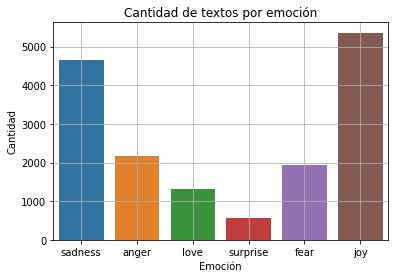

In [ ]:
sns.countplot(training['emotion'])
plt.grid()
plt.title('Cantidad de textos por emoción')
plt.xlabel('Emoción')
plt.ylabel('Cantidad')

## Distribución de longitud

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


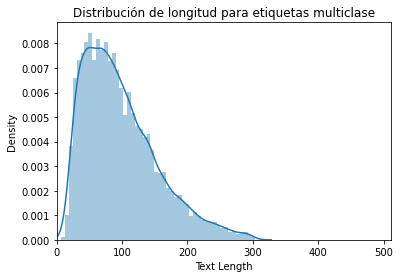

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


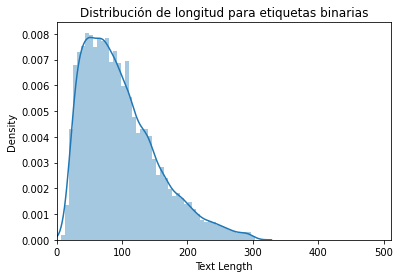

In [ ]:
# Base de datos para multiclasificación
training['text_length'] = training['text'].astype(str).apply(len)

sns.distplot(training['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length')
plt.title('Distribución de longitud para etiquetas multiclase')
plt.show()

# Base de datos para clasificación binaria
trainingB['text_length'] = trainingB['text'].astype(str).apply(len)

sns.distplot(trainingB['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length')
plt.title('Distribución de longitud para etiquetas binarias')
plt.show()

In [ ]:
training['text_length'].describe()

In [ ]:
trainingB['text_length'].describe()

## Palabras más usadas

### Palabras más usadas por cada sentimiento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


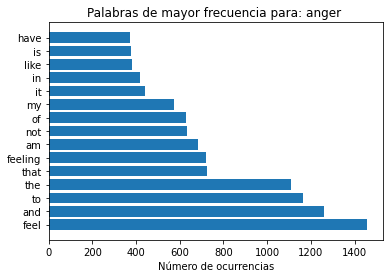

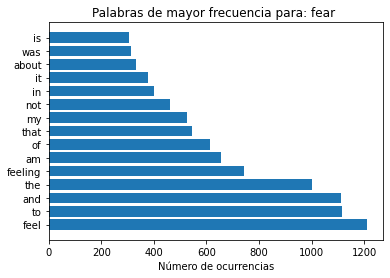

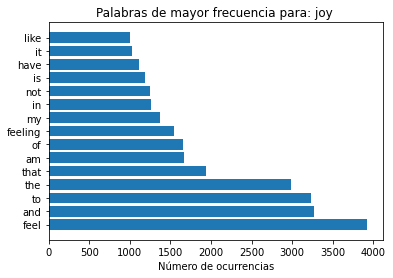

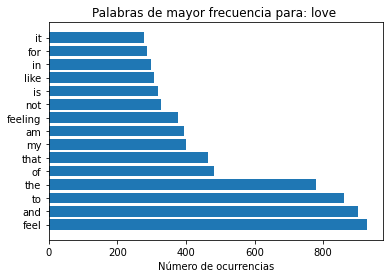

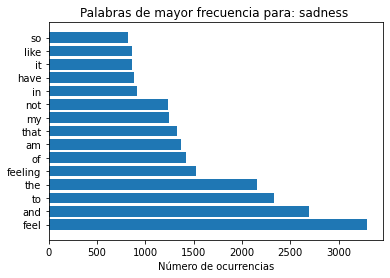

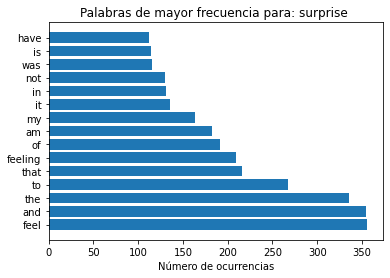

In [ ]:
# Matriz de frecuencias
df_grouped=training[['emotion','text']].groupby(by='emotion').agg(lambda x:' '.join(x))

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['text'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm=df_dtm.transpose()


# 'anger'
anger = pd.DataFrame({'anger' : df_dtm['anger'].nlargest(n=15), "emotion": df_dtm['anger'].nlargest(n=15).index})
plt.barh(y=anger.emotion, width=anger.anger)
plt.title('Palabras de mayor frecuencia para: anger ')
plt.xlabel('Número de ocurrencias')
plt.show()


# 'fear'
fear = pd.DataFrame({'fear' : df_dtm['fear'].nlargest(n=15), "emotion": df_dtm['fear'].nlargest(n=15).index})
plt.barh(y=fear.emotion, width=fear.fear)
plt.title('Palabras de mayor frecuencia para: fear ')
plt.xlabel('Número de ocurrencias')
plt.show()


# 'joy'
joy = pd.DataFrame({'joy' : df_dtm['joy'].nlargest(n=15), "emotion": df_dtm['joy'].nlargest(n=15).index})
plt.barh(y=joy.emotion, width=joy.joy)
plt.title('Palabras de mayor frecuencia para: joy ')
plt.xlabel('Número de ocurrencias')
plt.show()


# 'love'
love = pd.DataFrame({'love' : df_dtm['love'].nlargest(n=15), "emotion": df_dtm['love'].nlargest(n=15).index})
plt.barh(y=love.emotion, width=love.love)
plt.title('Palabras de mayor frecuencia para: love ')
plt.xlabel('Número de ocurrencias')
plt.show()


# 'sadness'
sadness = pd.DataFrame({'sadness' : df_dtm['sadness'].nlargest(n=15), "emotion": df_dtm['sadness'].nlargest(n=15).index})
plt.barh(y=sadness.emotion, width=sadness.sadness)
plt.title('Palabras de mayor frecuencia para: sadness ')
plt.xlabel('Número de ocurrencias')
plt.show()


# 'surprise'
surprise = pd.DataFrame({'surprise' : df_dtm['surprise'].nlargest(n=15), "emotion": df_dtm['surprise'].nlargest(n=15).index})
plt.barh(y=surprise.emotion, width=surprise.surprise)
plt.title('Palabras de mayor frecuencia para: surprise ')
plt.xlabel('Número de ocurrencias')
plt.show()

### WorldCloud para la base de datos de clasificación de polaridad

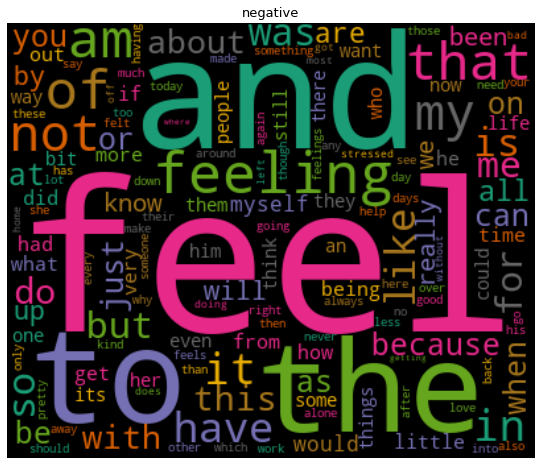

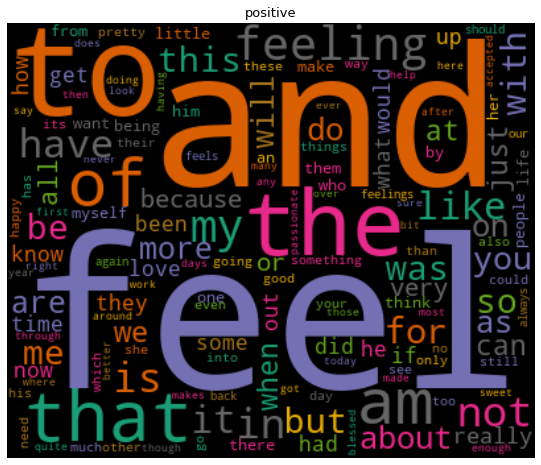

In [ ]:
# Matriz de frecuencias
df_groupedB=trainingB[['emotion','text']].groupby(by='emotion').agg(lambda x:' '.join(x))

# Función para crear WorldCloud
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()


cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_groupedB['text'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_groupedB.index

df_dtm=df_dtm.transpose()

# WordCloud de cada clase 
for index,clase in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[clase].sort_values(ascending=False),clase)

## Lematización

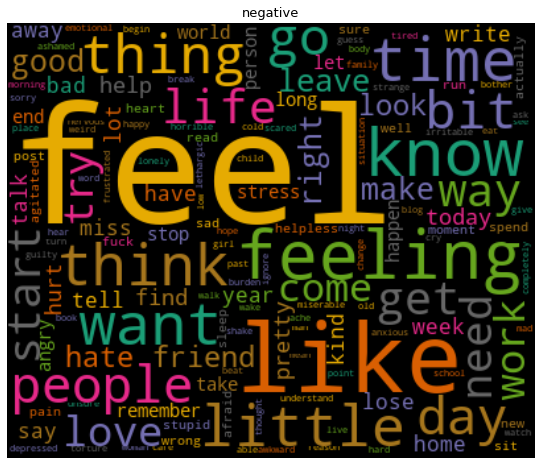

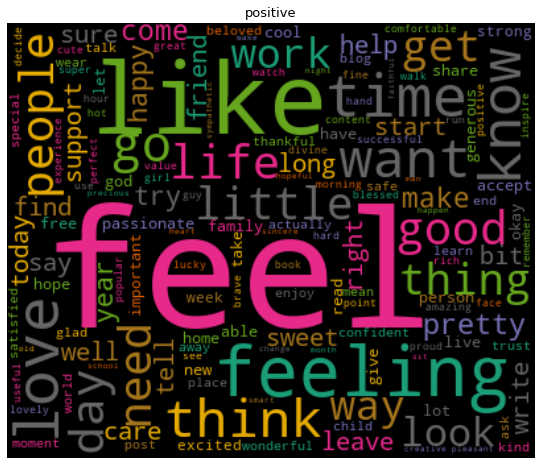

In [ ]:
# Crear modelo
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lematización con eliminación de stopwords 
trainingB['lemmatized']=trainingB['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

validationB['lemmatized']=validation['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

testB['lemmatized']=test['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

#Guardar datos lematizados
trainingB.to_csv("datosB_lema.csv", index= False)
validationB.to_csv("datosB_val_lema.csv", index= False)
testB.to_csv("datosB_test_lema.csv", index= False)

# Matriz de frecuencias
df_grouped=trainingB[['emotion','lemmatized']].groupby(by='emotion').agg(lambda x:' '.join(x))

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index

df_dtm=df_dtm.transpose()

# WordCloud para cada clase
for index,clase in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[clase].sort_values(ascending=False),clase)

# Modelos para análisis de sentimientos

## Carga de datos

In [1]:
# Librerías a importar
!pip install scikit-plot

import numpy as np
import spacy
from tensorflow import keras
from  keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,Dropout,Conv1D,MaxPooling1D
!pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.layers import LSTM, GRU, SimpleRNN
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ficheros a usar

Ejecutar una de las siguientes celdas en función de si se quiere entrenar para clasificación de polarización o de emociones.

In [2]:
# Carga de datos para clasificación de polarización

from google.colab import files
data=files.upload()

training = pd.read_csv("/content/datosB_lema.csv")
validation = pd.read_csv("/content/datosB_val_lema.csv")
test = pd.read_csv("/content/datosB_test_lema.csv")

# Para entrenar los texto sin lematizar se escoge la columna 'text' de los ficheros.
# Para entrenar con textos lematizados se escoge la columna 'lemmatized'.

# Conjunto de entrenamiento
X_train = training['text'] 
#X_train = training['lemmatized']
Y_train = training['label']

#Conjunto de validación
X_val = validation['text']
#X_val = validation['lemmatized']
Y_val = validation['label']

#Conjunto de prueba
X_test = test['text']
#X_test = test['lemmatized']
Y_test = test['label']

Saving datosB_lema.csv to datosB_lema.csv
Saving datosB_test_lema.csv to datosB_test_lema.csv
Saving datosB_val_lema.csv to datosB_val_lema.csv


In [ ]:
# Carga de datos para clasificación de emociones

from google.colab import files
data=files.upload()

training = pd.read_csv("/content/datos_limpiados.csv")
validation = pd.read_csv("/content/validation_limpiados.csv")
test = pd.read_csv("/content/test_limpiados.csv")

# Lematización

nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

training['lemmatized']=training['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
validation['lemmatized']=validation['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
test['lemmatized']=test['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

# Para entrenar los texto sin lematizar se escoge la columna 'text' de los ficheros.
# Para entrenar con textos lematizados se escoge la columna 'lemmatized'.

# Conjunto de entrenamiento
#X_train = training['text'] 
X_train = training['lemmatized']
Y_train = training['label']

#Conjunto de validación
#X_val = validation['text']
X_val = validation['lemmatized']
Y_val = validation['label']

#Conjunto de prueba
#X_test = test['text']
X_test = test['lemmatized']
Y_test = test['label']

## Tratamiento de los textos

In [3]:
# Tokenizar
tokenizer=Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_val]))

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

# Secuenciar
train_sequence=tokenizer.texts_to_sequences(X_train)
val_sequence = tokenizer.texts_to_sequences(X_val)
test_sequence = tokenizer.texts_to_sequences(X_test)

# Padding
max_len=max(max([len(x) for x in train_sequence]),max([len(x) for x in val_sequence]))
print(max_len)

X_train_pad=pad_sequences(train_sequence,maxlen=max_len,padding='post')
X_val_pad = pad_sequences(val_sequence,maxlen=max_len,padding='post')
X_test_pad = pad_sequences(test_sequence,maxlen=max_len,padding='post')

# Codificación de las etiquetas
y_train = to_categorical(Y_train) 
y_val = to_categorical(Y_val)
y_test = to_categorical(Y_test)

Vocabulary size = 15781
71


## Word embedding

In [4]:
# Descargar Glove
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove*.zip

# Función para crear la matriz
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
    hits = 0

    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
                hits+=1

    
    print("Converted %d words" % hits)
  
    return embedding_matrix_vocab
    
# Embedding Matrix
embedding_dim = 200
embedding_matrix_vocab = embedding_for_vocab(
    '/content/glove.twitter.27B.200d.txt', tokenizer.word_index,
  embedding_dim)

--2022-09-25 09:39:11--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-09-25 09:39:11--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.02MB/s    in 4m 44s  

2022-09-25 09:43:55 (5.10 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27

## Grid search

Esta celda únicamente se lanza cuando se hace clasificación de polarización.

In [ ]:
def create_model(num_units, dropout_rate, filter_size):
  model=Sequential()
  model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
  model.add(Conv1D(7,filter_size,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(num_units, dropout=dropout_rate))
  model.add(Dense(2,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  
model = KerasClassifier(model=create_model, epochs=20, verbose=0)
# Malla de Hiperparámetros
num_units = [50,100,150]
dropout_rate = [0.1, 0.2]
filter_size = [2, 3]
param_grid = dict(model__num_units=num_units, model__dropout_rate=dropout_rate, model__filter_size=filter_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_result = grid.fit(X_train_pad, y_train)

print("Mejor resultado de validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores hiperparámetros: {}".format(grid.best_params_))
# Mejor resultado de validación cruzada: 0.959
# Mejores hiperparámetros: {'model__dropout_rate': 0.1, 'model__filter_size': 2, 'model__num_units': 150}

Mejor resultado de validación cruzada: 0.959
Mejores hiperparámetros: {'model__dropout_rate': 0.1, 'model__filter_size': 2, 'model__num_units': 150}


## Modelos

### Arquitectura

Ejecutar la celda correspondiente al modelo que se desee entrenar.

In [5]:
# CNN + LSTM para clasificación binaria

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(Conv1D(7,2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 71, 200)           3156200   
                                                                 
 conv1d (Conv1D)             (None, 70, 7)             2807      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 35, 7)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 150)               94800     
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 3,254,109
Trainable params: 97,909
Non-trainable params: 3,156,200
_________________________________________

In [ ]:
# CNN + GRU para clasificación binaria

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(Conv1D(7,2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(150, dropout=0.1))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 71, 200)           3156200   
                                                                 
 conv1d_41 (Conv1D)          (None, 70, 7)             2807      
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 35, 7)            0         
 g1D)                                                            
                                                                 
 gru (GRU)                   (None, 150)               71550     
                                                                 
 dense_41 (Dense)            (None, 2)                 302       
                                                                 
Total params: 3,230,859
Trainable params: 74,659
Non-trainable params: 3,156,200
______________________________________

In [ ]:
# LSTM para clasificación binaria

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 71, 200)           3156200   
                                                                 
 lstm_38 (LSTM)              (None, 150)               210600    
                                                                 
 dense_42 (Dense)            (None, 2)                 302       
                                                                 
Total params: 3,367,102
Trainable params: 210,902
Non-trainable params: 3,156,200
_________________________________________________________________
None


In [ ]:
# CNN + LSTM para clasificación de emociones

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(Conv1D(7,2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 71, 200)           3222800   
                                                                 
 conv1d_42 (Conv1D)          (None, 70, 7)             2807      
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 35, 7)            0         
 g1D)                                                            
                                                                 
 lstm_39 (LSTM)              (None, 150)               94800     
                                                                 
 dense_43 (Dense)            (None, 6)                 906       
                                                                 
Total params: 3,321,313
Trainable params: 98,513
Non-trainable params: 3,222,800
______________________________________

In [ ]:
# CNN + GRU para clasificación de emociones

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(Conv1D(7,2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(150, dropout=0.1))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_44 (Embedding)    (None, 71, 200)           3222800   
                                                                 
 conv1d_43 (Conv1D)          (None, 70, 7)             2807      
                                                                 
 max_pooling1d_43 (MaxPoolin  (None, 35, 7)            0         
 g1D)                                                            
                                                                 
 gru_1 (GRU)                 (None, 150)               71550     
                                                                 
 dense_44 (Dense)            (None, 6)                 906       
                                                                 
Total params: 3,298,063
Trainable params: 75,263
Non-trainable params: 3,222,800
______________________________________

In [ ]:
# LSTM para clasificación de emociones

model=Sequential()
model.add(Embedding(vocabSize, 200, input_length=max_len, weights=[embedding_matrix_vocab], trainable=False))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 200)           2515000   
                                                                 
 lstm (LSTM)                 (None, 150)               210600    
                                                                 
 dense (Dense)               (None, 6)                 906       
                                                                 
Total params: 2,726,506
Trainable params: 211,506
Non-trainable params: 2,515,000
_________________________________________________________________
None


### Entrenamiento

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

hist=model.fit(X_train_pad,y_train,epochs=25,validation_data=(X_val_pad,y_val))

score = model.evaluate(X_test_pad,y_test) 
print("Testing Accuracy(%): ", score[1]*100)

Epoch 1/25
483/483 [==============================] - 28s 54ms/step - loss: 0.4319 - accuracy: 0.7887 - val_loss: 0.2356 - val_accuracy: 0.9161
Epoch 2/25
483/483 [==============================] - 25s 53ms/step - loss: 0.2328 - accuracy: 0.9128 - val_loss: 0.2124 - val_accuracy: 0.9369
Epoch 3/25
483/483 [==============================] - 25s 53ms/step - loss: 0.1795 - accuracy: 0.9362 - val_loss: 0.1278 - val_accuracy: 0.9562
Epoch 4/25
483/483 [==============================] - 31s 64ms/step - loss: 0.1399 - accuracy: 0.9503 - val_loss: 0.1281 - val_accuracy: 0.9599
Epoch 5/25
483/483 [==============================] - 25s 53ms/step - loss: 0.1245 - accuracy: 0.9570 - val_loss: 0.1428 - val_accuracy: 0.9562
Epoch 6/25
483/483 [==============================] - 26s 53ms/step - loss: 0.1106 - accuracy: 0.9638 - val_loss: 0.0885 - val_accuracy: 0.9708
Epoch 7/25
483/483 [==============================] - 26s 54ms/step - loss: 0.0894 - accuracy: 0.9685 - val_loss: 0.0823 - val_accuracy:

### Curvas de aprendizaje

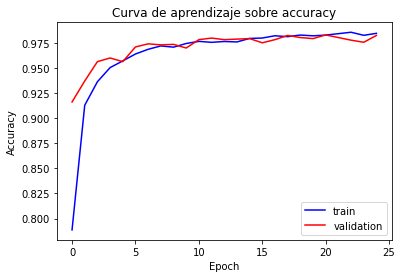

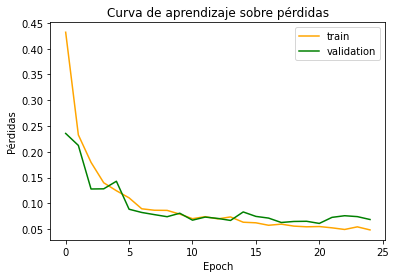

In [7]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Curva de aprendizaje sobre accuracy')
plt.show()

plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Pérdidas')
plt.title('Curva de aprendizaje sobre pérdidas')
plt.show()

### Matriz de confusión

Ejecutar la celda correspondiente en función de si se quiere entrenar para clasificación de polarización o de emociones.


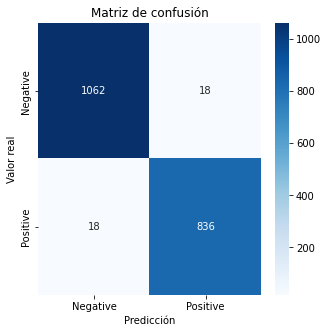

In [8]:
# Matriz de confusión para clasificación de polaridad
Y_pred=model.predict(X_test_pad)
y_predicted_labels = np.array([ np.argmax(i) for i in Y_pred])
y_predicted_labels

cm = confusion_matrix(Y_test, y_predicted_labels)
labels=['Negative','Positive']
plt.figure(figsize=(5,5))
sns.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

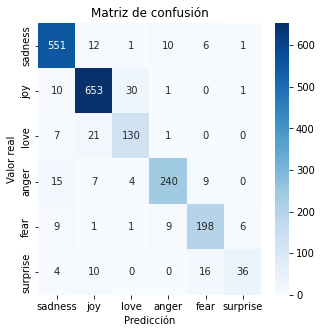

In [ ]:
# Matriz de confusión para clasificación de emociones
Y_pred=model.predict(X_test_pad)
y_predicted_labels = np.array([ np.argmax(i) for i in Y_pred])
y_predicted_labels

cm = confusion_matrix(Y_test, y_predicted_labels)
labels=['sadness','joy','love','anger','fear','surprise']
plt.figure(figsize=(5,5))
sns.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

### Métricas de evaluación

Si para el caso de clasificación múltiple se desea las métricas por cada clase se añade el parámetro average=None.

In [9]:
print(f1_score(Y_test, y_predicted_labels))
#print(f1_score(Y_test, y_predicted_labels, average=None))

print(accuracy_score(Y_test, y_predicted_labels) )

print(recall_score(Y_test, y_predicted_labels))
#print(recall_score(Y_test, y_predicted_labels, average=None))

print(precision_score(Y_test, y_predicted_labels)) 
#print(precision_score(Y_test, y_predicted_labels, average=None))

0.9789227166276346
0.9813857290589452
0.9789227166276346
0.9789227166276346


## Guardar modelo

In [10]:
model.save('modeloCNNLSTM.h5')